In [26]:
import functions as f
import pandas as pd
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')

Before we start with an exploration of the word embeddings, let's repeat what data is used to train our models in order to get these embeddings.

## 1. Generation of Training Data

In [27]:
#from what text do you want to generate the training data?
input_text = "Hello and welcome everyone to our presentation Word2Vec. We hope you learn something interesting"

#choose between Skip-gram and CBOW
architecture = "Skip-gram"

#specify the window_size
context_size = 3

In [3]:
#Let's have a look on how the training data for the Skip-gram architecture would be generated 
#for the specified input text and context size
training_data_skipGram = f.illustrate_generation_of_data(input_text, architecture = architecture, 
                                                         window_size = context_size)

 hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input     Output
--------  ------------
everyone  hello
everyone  and
everyone  welcome
everyone  to
everyone  our
everyone  presentation 

hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input    Output
-------  ------------
to       and
to       welcome
to       everyone
to       our
to       presentation
to       word2vec 

hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input    Output
-------  ------------
our      welcome
our      everyone
our      to
our      presentation
our      word2vec
our      we 

hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input         Output
------------  --------
presentation  everyone
presentation  to
presentation  our
presentation  word2vec
presentation  we
presentation  hope 

hello and welcome everyo

In [4]:
#let's have a look the whole training data set for Skip-gram
f.show_table_of_training_data(training_data_skipGram)

Input         Output
------------  ------------
everyone      hello
everyone      and
everyone      welcome
everyone      to
everyone      our
everyone      presentation
to            and
to            welcome
to            everyone
to            our
to            presentation
to            word2vec
our           welcome
our           everyone
our           to
our           presentation
our           word2vec
our           we
presentation  everyone
presentation  to
presentation  our
presentation  word2vec
presentation  we
presentation  hope
word2vec      to
word2vec      our
word2vec      presentation
word2vec      we
word2vec      hope
word2vec      you
we            our
we            presentation
we            word2vec
we            hope
we            you
we            learn
hope          presentation
hope          word2vec
hope          we
hope          you
hope          learn
hope          something
you           word2vec
you           we
you           hope
you           learn
you 

How does the generation of training data look like for the CBOW architecture?

In [5]:
#Let's have a look on how the training data for the CBOW architecture would be generated 
#for the specified input text and context size
training_data_CBOW = f.illustrate_generation_of_data(input_text, architecture = "CBOW", window_size = context_size)

 hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input                                                     Output
--------------------------------------------------------  --------
['hello', 'and', 'welcome', 'to', 'our', 'presentation']  everyone 

hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input                                                              Output
-----------------------------------------------------------------  --------
['and', 'welcome', 'everyone', 'our', 'presentation', 'word2vec']  to 

hello and welcome everyone to our presentation word2vec we hope you learn something interesting 

Input                                                            Output
---------------------------------------------------------------  --------
['welcome', 'everyone', 'to', 'presentation', 'word2vec', 'we']  our 

hello and welcome everyone to our presentation word2vec we hope y

In [6]:
#let's have a look the whole training data set for CBOW
f.show_table_of_training_data(training_data_CBOW)

Input                                                              Output
-----------------------------------------------------------------  ------------
['hello', 'and', 'welcome', 'to', 'our', 'presentation']           everyone
['and', 'welcome', 'everyone', 'our', 'presentation', 'word2vec']  to
['welcome', 'everyone', 'to', 'presentation', 'word2vec', 'we']    our
['everyone', 'to', 'our', 'word2vec', 'we', 'hope']                presentation
['to', 'our', 'presentation', 'we', 'hope', 'you']                 word2vec
['our', 'presentation', 'word2vec', 'hope', 'you', 'learn']        we
['presentation', 'word2vec', 'we', 'you', 'learn', 'something']    hope
['word2vec', 'we', 'hope', 'learn', 'something', 'interesting']    you


## 2. Closer look at the word vectors produced by Skip-gram and CBOW 

In [7]:
#import
from gensim.models import KeyedVectors
import gensim.downloader as api

#### We use the module gensim.models.word2vec which implements the algorithms of Skip-gram and CBOW using either hierarchical softmax or negative sampling

#### Get the vectors by loading pretrained ones or by training a model ourselfes

Here we used word vectors generated on the entire Google News dataset, of about 100 billion words with 300 dimensions.

In [8]:
#loading vectors
wv = api.load('word2vec-google-news-300')

### 2.1 First glance at the word vectors

In [9]:
#let's specify a word and have a look at its word vector
word = 'summer'
vector_of_word = wv[word]
print('Vector for the word', word, ': \n\n', vector_of_word, '\n')
print('dimensions:', len(vector_of_word))

Vector for the word summer : 

 [ 0.06835938  0.31445312 -0.1953125   0.0378418  -0.08398438 -0.02148438
  0.09814453 -0.18359375 -0.00268555  0.17773438  0.02832031 -0.02709961
  0.05712891 -0.03808594 -0.03637695 -0.0378418  -0.12695312 -0.05175781
  0.03112793 -0.08251953 -0.05419922  0.32617188 -0.08007812 -0.11035156
 -0.25195312  0.03955078  0.3984375   0.10546875 -0.03735352  0.27148438
  0.08251953  0.09521484  0.07128906  0.17871094 -0.01855469 -0.17382812
 -0.24511719 -0.42578125 -0.06787109 -0.04150391  0.03100586 -0.19140625
  0.16894531 -0.03295898 -0.15429688 -0.06982422  0.04980469  0.16894531
  0.07128906  0.18847656  0.15039062 -0.18261719 -0.18359375 -0.02087402
  0.11083984  0.01794434  0.03540039 -0.10498047 -0.06225586 -0.12255859
 -0.11523438  0.03759766 -0.05664062  0.0123291  -0.01806641  0.03979492
 -0.09082031 -0.06787109  0.02490234 -0.04907227  0.21875    -0.02722168
  0.00518799  0.22949219  0.01782227  0.08300781 -0.02416992  0.05981445
  0.03100586  0.081

#### There is not much to see yet, so let's check if these vectors are kind of meaningful

#### 2.1.1 Visualization of vectors by colors

Since it is hard to compare vectors by seeing just some numbers, let's look at the representation of these numbers by a heatmap:

first dimension of word vector = 0.068359375
second dimension of word vector = 0.314453125


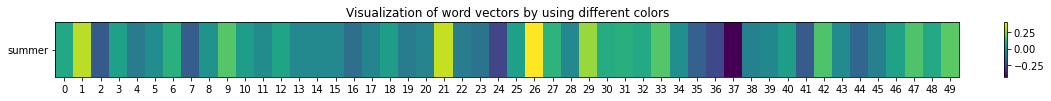

In [10]:
#define word
words = ['summer']
#get word vector
vector_of_word = wv[word]
#print value of first dimension of word vector
print('first dimension of word vector = {}'.format(vector_of_word[0]))
print('second dimension of word vector = {}'.format(vector_of_word[1]))
#visualize dimensions by colors
f.visualize_vectors_by_colors(words, wv, dim=50, figsize=(20,1))

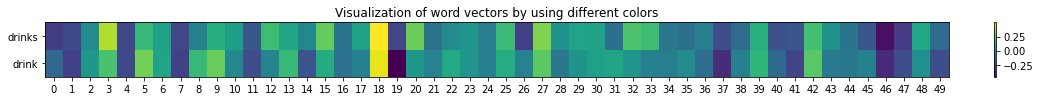

Cosine similarity between these words is 0.80529493


In [11]:
#let's try out some words where we expect similar word vectors
words = ['drink', 'drinks']
#here we expect more similar vectors, the cosine similarity would be close to 1
f.visualize_vectors_by_colors(words, wv, dim=50, figsize=(20,1))
print('Cosine similarity between these words is', wv.similarity('drink', 'drinks'))

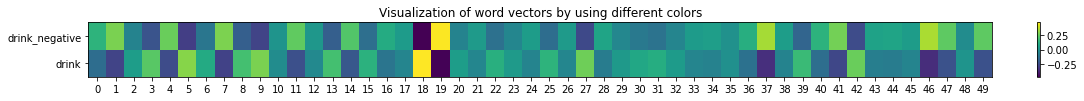

Cosine similarity between these words is 0


In [12]:
#How would look word vectors with that would be the most unsimilar?
words = ['drink']
#here we expect very unsimilar vectors, the cosine similarity would be 0
f.visualize_vectors_and_negative_by_color(words, wv, dim=50, figsize=(20,1))
print('Cosine similarity between these words is 0')

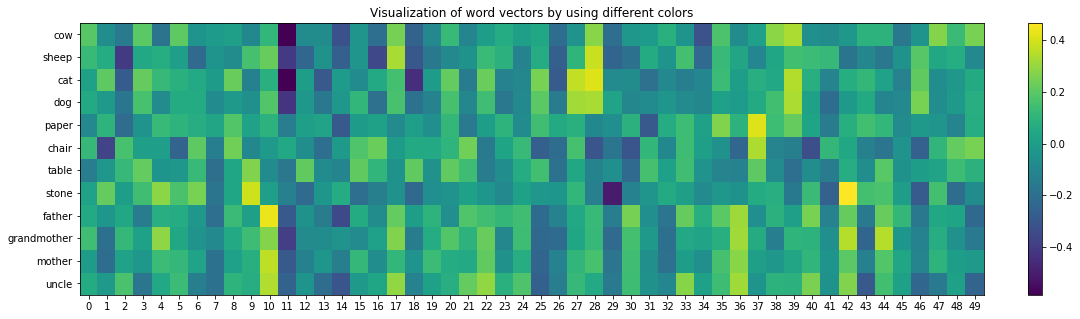

In [13]:
#now let's see if we can find some sense in the dimensions of our word vectors by plotting
#different groups of words, here persons, objects and animals

words_to_compare = ['uncle', 'mother','grandmother','father', 
                    'stone', 'table', 'chair', 'paper',
                    'dog', 'cat', 'sheep', 'cow']

f.visualize_vectors_by_colors(words_to_compare, wv, dim=50)

#### 2.1.2 Find the word with the most similar vector

In [14]:
#here the word with the most similar vector to a vector of a specified word will be returned 
#based on their cosine similarity
#the cosine similarity ranges from 0 (not similar at all) to 1 (identical)
word = 'bank'
print('Words most similar to', word, ':')
wv.most_similar(word, topn=10) #and let's try out different words 

Words most similar to bank :


[('banks', 0.7440759539604187),
 ('banking', 0.690161406993866),
 ('Bank', 0.6698698401451111),
 ('lender', 0.6342284679412842),
 ('banker', 0.6092953085899353),
 ('depositors', 0.6031531691551208),
 ('mortgage_lender', 0.5797975659370422),
 ('depositor', 0.5716428160667419),
 ('BofA', 0.5714625120162964),
 ('Citibank', 0.5589520931243896)]

##### So the word vectors seem to include some semantics

### 2.2 Advanced visualization of word embeddings

#### 2.2.1 Plot of word vectors in 2d space using t-SNE

Another exciting operation we can do with embeddings is visualization, plotting them in a 2D dimensional space can 
show us how words are related. Most similar words should be plotted in groups while non related words will appear 
in a large distance. This requires a further dimension reduction technique to get the dimensions to 2 or 3. 
The most popular technique for reduction is itself an embedding method: t-Distributed Stochastic Neighbor Embedding (TSNE).

t-SNE stands for t-distributed stochastic neighbor embedding. It is a technique for dimensionality reduction that is 
best suited for the visualization of high dimensional data-set.

TSNE is a manifold learning technique which means that it tries to map high-dimensional data to a lower-dimensional 
manifold, creating an embedding that attempts to maintain local structure within the data. It's almost exclusively 
used for visualization because the output is stochastic and it does not support transforming new data.

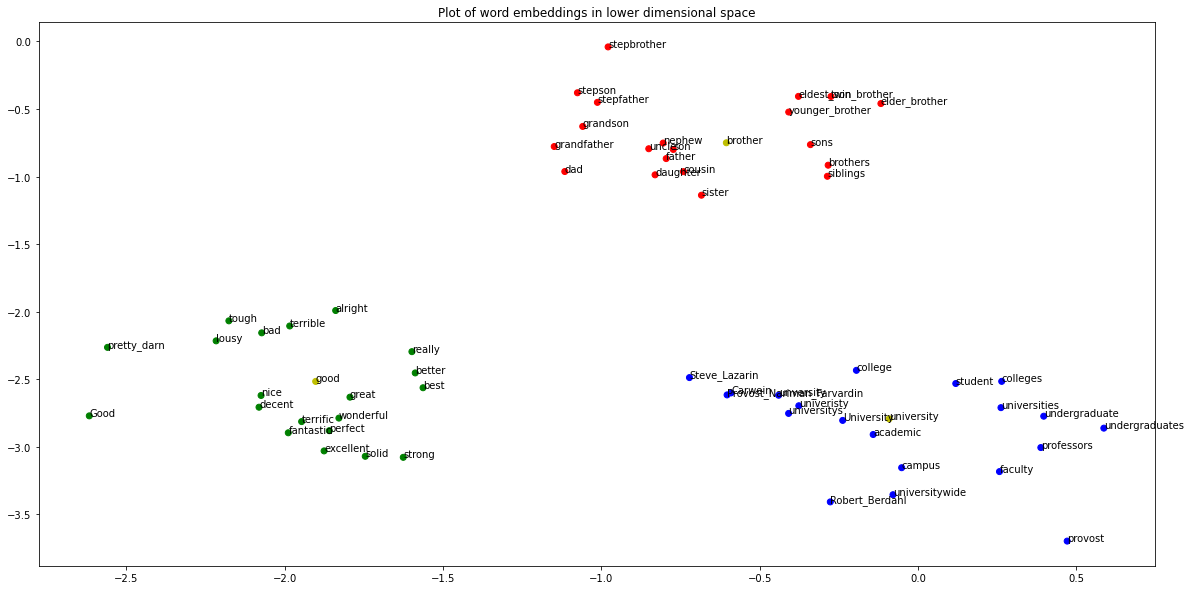

In [15]:
#define words of which we want to plot similar ones
similar_words_to_plot = ['university', 'good', 'brother']
#plot the defined words together with the similar ones in 2d using the t-SNE method
f.plot_tsne_of_words_similar_to_words_of_given_list(similar_words_to_plot, 20, wv)

#### 2.2.2 Plot of words in 2d space using PCA to see some relations

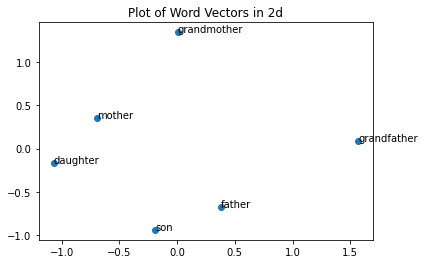

In [20]:
#Let's try to visualize some relations in 2d using PCA
words_1 = ['grandfather', 'grandmother', 'father', 'mother', 'son', 'daughter']
words_2 = ['small', 'smaller', 'big', 'bigger', 'large', 'larger', 'tiny', 'tinier']
words_3 = ['germany', 'berlin', 'france', 'paris', 'italy', 'rome']
f.plot_2d_pca(words_1, wv)

### 2.3 Arithmetics with word vectors

In [17]:
#to add n word vectors we use the syntax positive=[word1, word2,.., wordn], 
#to substract k words we use negative=[word1, word2,...wordk]
#we can combine addition and substraction
#after that we can look for the word with the most similar word vector to our result with the method most_similar

# king - man + woman
word_most_similar = wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print('King - Man + Woman = ',*word_most_similar)

King - Man + Woman =  ('queen', 0.7118193507194519)


In [25]:
#try out:
#breakfast + evening - morning
#sunrise + evening - morning
#france + rome - paris 
#sister + man - woman
#france + english - french
#sunday + friday - saturday
#uncle + woman - man
#bigger + small - big --> topn=2
#sun + night - day --> does not work

positive = ['france', 'rome']
negative = ['paris']
number_most_similar = 1

words_most_similar = wv.most_similar(positive, negative, topn=number_most_similar)

f.print_string_arithmetics(positive, negative, words_most_similar)

france + rome - paris = ('italy', 0.5199521780014038)


### 3. Use case - Sentiment Analaysis

#### 3.1 Import data

In [19]:
#import data (movie reviews downloaded from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
train_data = pd.read_csv('movieReviews_with_sentiment.tsv', header = 0, delimiter = '\t', quoting = 3)

In [3]:
train_data.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,0
1,2,1,A series of escapades demonstrating the adage ...,1
2,3,1,A series,1
3,4,1,A,1
4,5,1,series,1


Encoding of Sentiments: <br>

0 - negative <br>
1 - neutral <br>
2 - positive <br>


In [4]:
f.print_examples_for_sentiments(train_data)

Example phrases for different sentiments:

Negative:

- have a hard time sitting through this one
- almost feels as if the movie is more interested in entertaining itself than in amusing us .

Neutral:

- amuses but none of which amounts to much of a story
- Shakespearean tragedy

Positive:

- first computer-generated feature cartoon
- a perfect performance


#### 3.2 Prepare training data

In [5]:
#get numpy array of phrases (input) and labels = sentiment (output)
phrases = np.array(train_data['Phrase'])
labels = np.array(train_data['Sentiment'])

In [6]:
#in a first step we have to clean the data in order to preprocess our phrases:
#lowercase
#remove punctuations - examples are: points, quotation marks, come, plus, hyphen,...
#remove stopwords - examples are: [i, and, or, with, that, my, your, but, or, by, on...]
#split phrases in lists of words

phrases_preprocessed = [f.clean_data(phrase) for phrase in phrases]

In [7]:
#let's compare the phrases before and after preprocessing
print('Phrase before preprocessing:\n\n{}\n\n'.format(phrases[0]))
print('Phrase after preprocessing:\n\n{}'.format(phrases_preprocessed[0]))

Phrase before preprocessing:

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


Phrase after preprocessing:

['series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'good', 'gander', 'occasionally', 'amuses', 'amounts', 'story']


#### 3.3 Generate and train Word2Vec model

In [8]:
#import of library which implements the architectures Skip-gram and CBOW
from gensim.models import Word2Vec

In [9]:
#let's define the parameters for our architecture
architecture = 1 # 1 --> skip-gram, 0 --> CBOW
hs = 1 # 1 --> hierarchical softmax, 0 --> negative sampling
num_features = 200
min_count = 10
context = 10

model = Word2Vec(phrases_preprocessed, vector_size=num_features, min_count=min_count, window=context, sg = architecture, hs = hs)

In [10]:
#Let's examine our model
print('Size of vocabulary: {}\n'.format(len(model.wv.index_to_key)))
print('Part of dictionary: {}\n'.format(model.wv.index_to_key[9:19]))
word_to_show_embedding = 'fun'
print('For each of these words we now have an embedding, for example for the word {}:\n'.format(word_to_show_embedding))
print(model.wv[word_to_show_embedding])
print('\nDimension of each word embedding: {}'.format(len(model.wv[word_to_show_embedding])))

Size of vocabulary: 15980

Part of dictionary: ['characters', 'time', 'comedy', 'little', 'funny', 'way', 'life', 'movies', 'love', 'new']

For each of these words we now have an embedding, for example for the word fun:

[-0.13386418 -0.01411968  0.05951418  0.19526991  0.08285788  0.47596115
  0.2882401   0.2012812  -0.05637824  0.25606936 -0.16089967 -0.03255827
 -0.24871737  0.262217    0.24416232 -0.0272872  -0.5355783   0.07098291
 -0.05180697 -0.6382654   0.31306663  0.22136272  0.2654871  -0.28358063
  0.28129622  0.08671045  0.14154392 -0.52299273 -0.12791619  0.3600457
  0.02868849 -0.3551984   0.02959908  0.78023547  0.04099558  0.9018609
 -0.02389745 -0.23573454 -0.08977703  0.39062223  0.17007245 -0.35859555
  0.48612097 -0.53111076  0.10020532  0.03568386 -0.24840827  0.20780642
  0.36438102  0.26270702 -0.1628139   0.06738089  0.15092808  0.220037
 -0.30620906  0.13950591 -0.1595415  -0.35453334  0.05373542 -0.1431616
 -0.06125915  0.32590225  0.43211582 -0.38196987 -0.00

#### 3.4 Use bag of word approach to characterize phrases by word vectors

In [11]:
#bag of words approach 
#we now have phrases that consist of several words --> building of average vectors for each phrase
X, y, phrases_removed = f.get_X_y_average_vector_for_each_phrase(phrases_preprocessed, labels, model, num_features)

0 out of 624243 phrases processed
100000 out of 624243 phrases processed
200000 out of 624243 phrases processed
300000 out of 624243 phrases processed
400000 out of 624243 phrases processed
500000 out of 624243 phrases processed
600000 out of 624243 phrases processed
Generation of Data successful


#### 3.5 Instantiate and train classifier

In [12]:
#choose a classifier
from sklearn.linear_model import LogisticRegression
#train the model
clf = LogisticRegression().fit(X, y)

In [52]:
#let's try out the sentiment analysis
#I love the movie
#the movie is good/bad/ok
#it is a bad movie
#not good/bad --> wieso klappt nicht?
our_review = 'The movie is not bad'
f.classify_sample_review(our_review, clf, model, num_features)

This review was classified as negative.


In [55]:
def classify_sample_review(review, clf, model, num_features):
    review = clean_data(review)
    average_vec,_,_ = get_X_y_average_vector_for_each_phrase([review], np.array([0]), model, num_features, print_status=False)
    prediction = int(clf.predict_proba(average_vec)[0])
    if prediction == 0:
        pred = 'negative'
    elif prediction == 1:
        pred = 'neutral'
    elif prediction == 2:
        pred = 'positive'
    else:
        print(pred)
    print("This review was classified as {}.".format(pred))

In [53]:
classify_sample_review(our_review)

ValueError: Expected 2D array, got scalar array instead:
array=The movie is not bad.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Thank's for your attention!

In [ ]:





































#what happens here?
from sklearn.decomposition import IncrementalPCA  
from sklearn.manifold import TSNE
import numpy as np

#define words you want to find similar ones to plot in lower dimension
word1 = 'garden'
word2 = 'bottle'
word3 = 'cake'

#for each similar word we get a tuple of the word and the distance to the first word
words_similar_word1 = wv.similar_by_word(word1, 20)
words_similar_word2 = wv.similar_by_word(word2, 20)
words_similar_word3 = wv.similar_by_word(word3, 20)

print('Words similar to {}:\n{}'.format(word1, words_similar_word1))

#we just want to get the words without the distance
words = ([word1] + [w1[0] for w1 in words_similar_word1] + 
         [word2] + [w2[0] for w2 in words_similar_word2] + 
         [word3] + [w3[0] for w3 in words_similar_word3])

print('\nAll words to examine:\n{}'.format(words))

#get vectors of the corresponding words
vectors = []
for word in words:
    vectors.append(wv[word])
    
print('\nVector of first word:\n{}'.format(vectors[0]))

#apply TSNE to vectors to get them in a 2-dimensional vector space
tsne_model = TSNE(perplexity=45, n_components=2, init='pca', n_iter=3000, random_state=123)
vectors_dim2 = tsne_model.fit_transform(vectors)

print('\nDimensionality of vectors before: {}'.format(np.shape(vectors[0])[0]))
print('Dimensionality of vectors after applying TSNE: {}'.format(np.shape(vectors_dim2[0])[0]))

#plot 2-dimensional word embeddings
f.plot_vectors_group_of_similar_words(vectors_dim2, number_groups=3, labels=words)